In [4]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
from matplotlib import pyplot as plt
#import pandas.util.testing as tm
plt.style.use('ggplot')

In [5]:
df = pd.read_csv(r'C:\Users\neha gupta\Downloads\creditcard.csv.zip')

In [6]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()

This data frame has 284807 rows and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
print(data.shape) 


(284807, 31)


In [7]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11978,20682.0,1.185730,-0.324091,1.011124,-0.561848,-0.965817,-0.305719,-0.733488,0.025975,3.111957,...,-0.129442,0.131015,-0.003086,0.035685,0.397872,-0.696407,0.080891,0.027211,11.85,0
109305,71322.0,-2.703230,2.633833,-0.551190,-0.680426,-0.002812,0.453238,-0.340008,0.163982,0.535866,...,0.354796,-1.071946,0.134211,-1.254848,0.235210,0.156529,0.377824,0.117644,8.91,0
137488,82181.0,1.385894,-1.144105,0.266850,-1.285149,-1.532513,-1.031039,-0.727155,-0.279753,-1.907863,...,-0.312176,-0.704899,0.041804,0.296891,0.281411,-0.343338,0.009998,0.033505,86.90,0
28939,35245.0,-0.848500,1.120921,1.566582,-0.219952,-0.245677,-0.702635,0.731467,-0.052488,0.094665,...,-0.297705,-0.590732,-0.006984,0.467311,-0.227081,0.027652,0.308238,0.008947,17.99,0
34601,37745.0,-0.214868,1.192629,-0.193224,0.956839,0.010127,-0.760068,0.463342,0.416964,-0.376230,...,0.184074,0.536576,0.144293,0.029261,-0.829591,-0.376442,0.313910,0.161035,12.10,0


In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


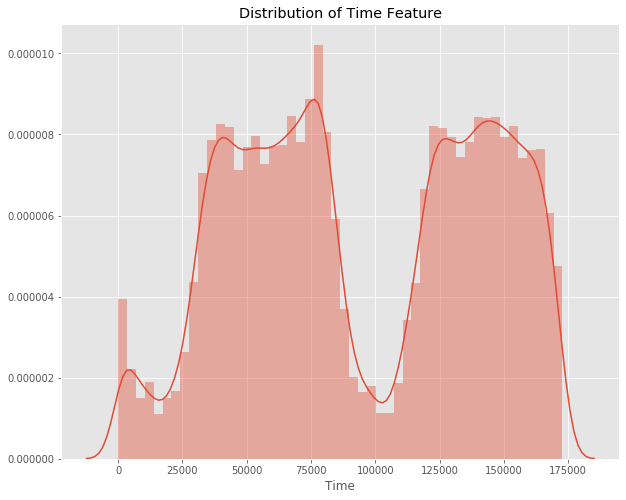

In [10]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

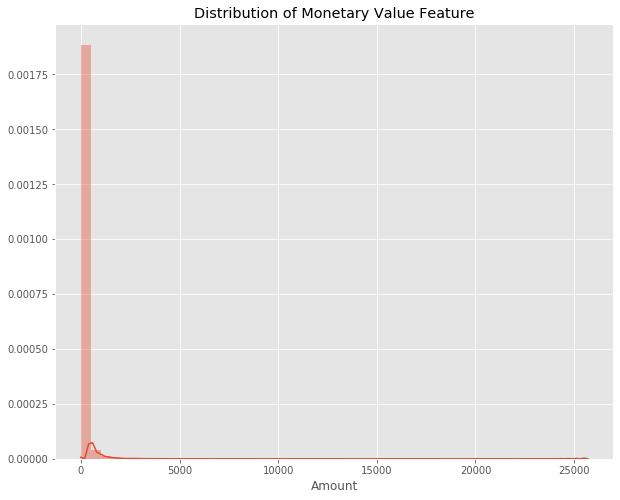

In [11]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [12]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

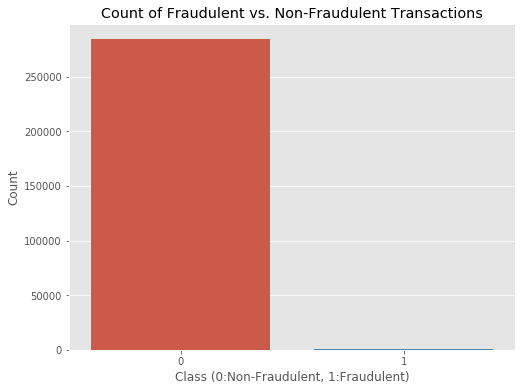

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [14]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

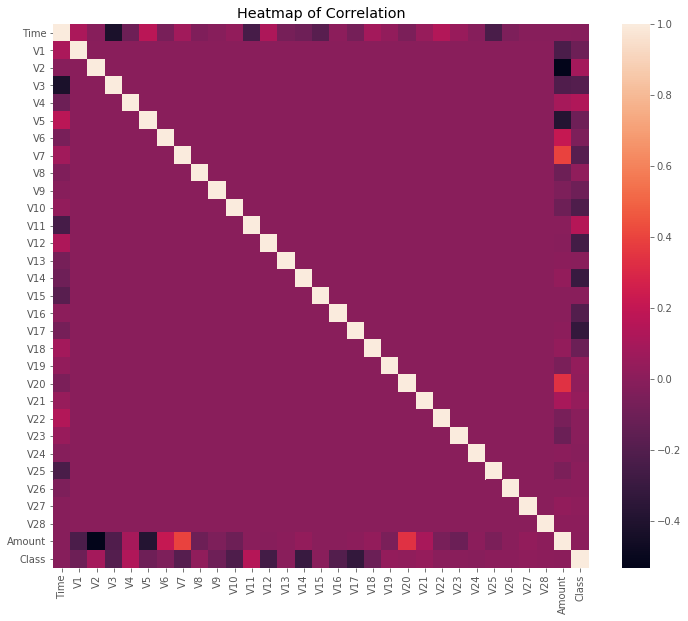

In [15]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [16]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [18]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [19]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
207224,136575.0,1.843,-0.323,-0.427,1.420,-0.501,-0.397,-0.323,-0.096,0.899,...,-0.049,-0.053,0.117,-0.376,0.046,-0.027,67.00,0,-0.085,0.879
42970,41317.0,1.121,-0.092,0.995,1.429,-0.718,0.166,-0.551,0.225,0.873,...,-0.096,0.087,0.537,-0.167,0.068,0.025,9.99,0,-0.313,-1.127
249640,154510.0,1.955,-0.877,-2.535,-0.265,-0.064,-1.723,0.728,-0.676,-1.050,...,-0.207,0.046,0.405,1.009,-0.153,-0.068,159.99,0,0.286,1.257
156139,107388.0,-1.107,1.052,1.580,1.006,0.761,1.082,0.260,0.346,0.887,...,-0.352,-1.184,0.411,-0.835,-0.297,-0.278,20.99,0,-0.269,0.265
257238,158063.0,2.042,-0.350,-1.791,0.396,0.229,-0.707,0.278,-0.348,-1.435,...,0.040,-0.513,0.223,-0.589,-0.006,-0.058,58.80,0,-0.118,1.332


In [20]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [21]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256228, 31)
Test Shape: (28579, 31)


In [22]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [23]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 446 fraudulent transactions in the train data.


In [24]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [25]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
68945,-20.865,-24.266,-3.776,3.434,5.296,-5.408,-1.576,0.296,2.138,-2.029,...,-0.503,1.448,0.280,0.891,-0.225,3.482,-6.621e+00,0,0.258,-0.803
13655,-2.854,0.760,0.608,1.104,1.156,-1.135,0.135,0.747,-1.580,-0.487,...,-0.200,-0.940,0.109,0.647,-0.168,-0.249,-4.942e-01,0,-0.340,-1.438
32168,-3.107,-2.159,1.117,-1.515,-0.638,0.268,-0.264,0.597,-1.087,-0.262,...,-0.421,0.096,-0.196,-0.003,1.267,-0.213,-2.611e-02,0,0.606,-1.191
95184,-0.808,-0.551,2.301,-1.295,-1.832,0.650,-1.601,0.888,-2.203,0.874,...,0.168,-0.085,0.005,-0.065,0.001,0.028,-1.510e-02,0,-0.265,-0.528
7289,1.302,-0.262,-0.723,-0.854,1.700,3.426,-1.014,0.794,1.596,-0.461,...,-0.232,-0.052,1.022,0.368,1.046,-0.087,-8.091e-04,0,-0.289,-1.765


In [26]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [27]:
subsample = pd.concat([selected, fraud])
len(subsample)

892

In [28]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.172,0.129,0.498,0.458,-0.260,-0.203,-0.136,0.096,-0.177,0.067,...,-0.541,0.156,0.005,0.105,0.108,-0.018,0.005,0,-0.343,-0.268
1,-2.219,0.728,-5.458,5.925,3.932,-3.086,-1.678,0.865,-3.177,-3.419,...,-0.817,-0.029,0.026,-0.826,-0.013,0.413,-0.131,1,-0.353,1.122
2,-2.488,4.359,-7.776,5.364,-1.824,-2.445,-4.964,1.485,-2.948,-7.175,...,1.021,-0.266,-0.371,0.366,0.081,0.185,-0.212,1,-0.349,0.164
3,-5.188,6.968,-13.511,8.618,-11.214,0.672,-9.463,5.329,-4.897,-11.787,...,0.760,0.717,-0.647,-1.617,0.172,0.627,-0.170,1,2.711,-1.621
4,1.067,-0.250,1.187,1.257,-0.904,0.479,-0.878,0.474,0.782,0.106,...,0.578,-0.051,-0.025,0.327,-0.223,0.065,0.019,0,-0.305,-0.985
5,-0.495,1.408,-0.499,0.812,0.784,-0.354,0.922,0.345,-0.961,-0.038,...,0.637,-0.281,-0.468,0.052,-0.363,0.305,0.161,0,-0.297,1.202
6,-5.622,3.481,-6.201,4.311,-5.226,-1.342,-5.221,2.683,-2.921,-6.561,...,-0.429,-0.351,0.198,0.159,-0.378,-0.214,0.460,1,0.526,-0.384
7,-13.193,12.786,-9.907,3.320,-4.801,5.760,-18.751,-37.353,-0.392,-5.053,...,-8.887,5.304,-0.639,0.263,-0.109,1.270,0.939,1,-0.349,-0.560
8,-2.922,-0.228,-5.877,2.202,-1.935,0.631,-1.245,1.511,-1.900,-6.428,...,0.896,1.386,-2.028,0.509,0.173,0.727,0.235,1,2.538,0.950
9,-3.159,1.765,-3.390,0.987,-1.510,-1.281,-2.720,0.718,-1.660,-3.841,...,1.605,-0.619,-0.251,-0.241,-0.004,-0.235,0.018,1,-0.016,0.853


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

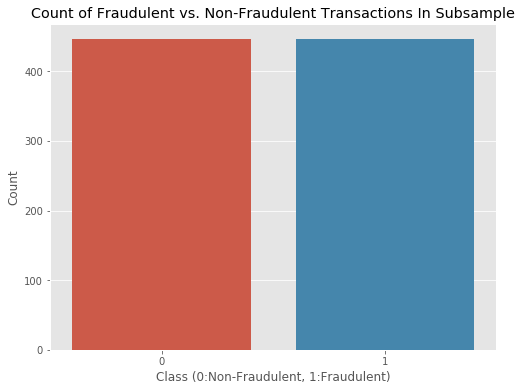

In [29]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [30]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-4.207e-01
V2,4.916e-01
V3,-5.742e-01
V4,7.115e-01
V5,-3.734e-01
V6,-3.835e-01
V7,-4.715e-01
V8,4.456e-02
V9,-5.525e-01
V10,-6.282e-01


In [31]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.574
V9,-0.552
V10,-0.628
V12,-0.677
V14,-0.750
V16,-0.600
V17,-0.557


In [32]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.712
V11,0.685
Class,1.000


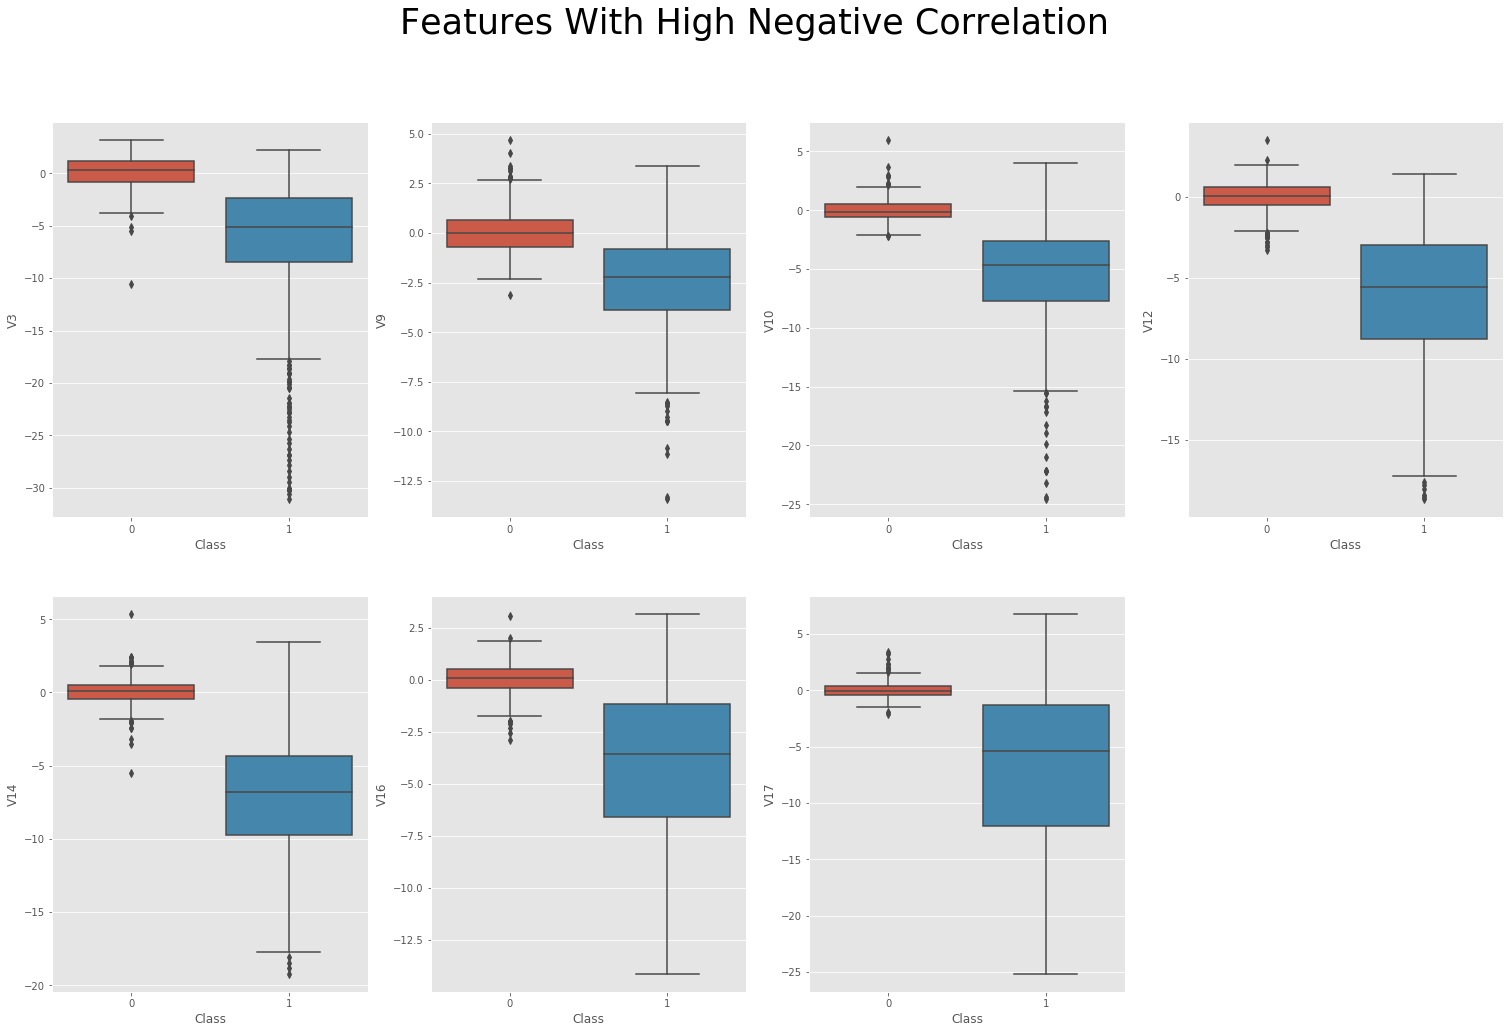

In [33]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

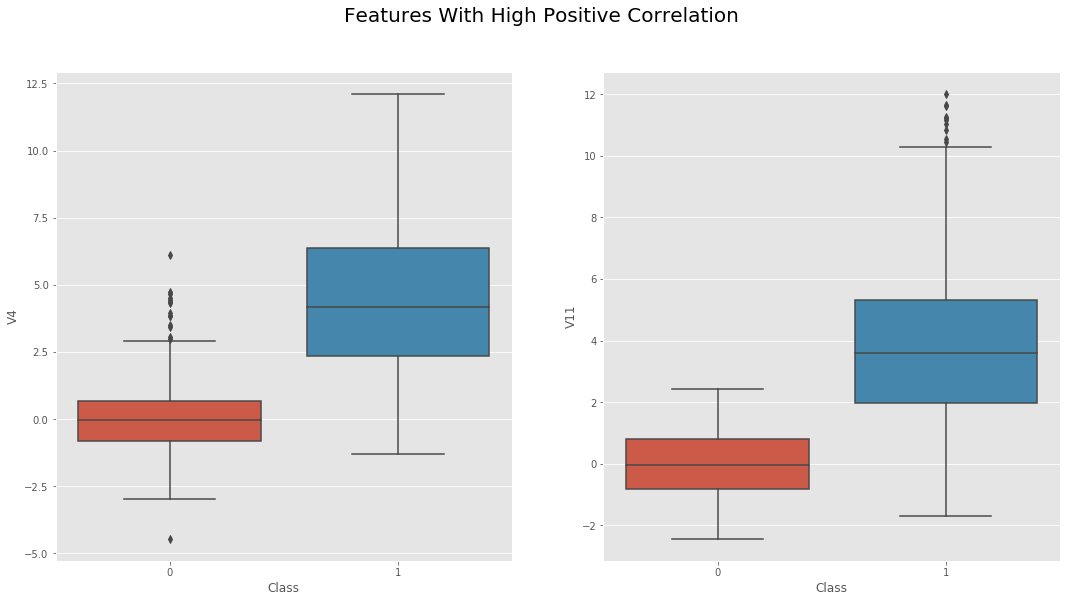

In [34]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [35]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [36]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 892 transactions by 254 transactions to 638 transactions.


In [37]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [38]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

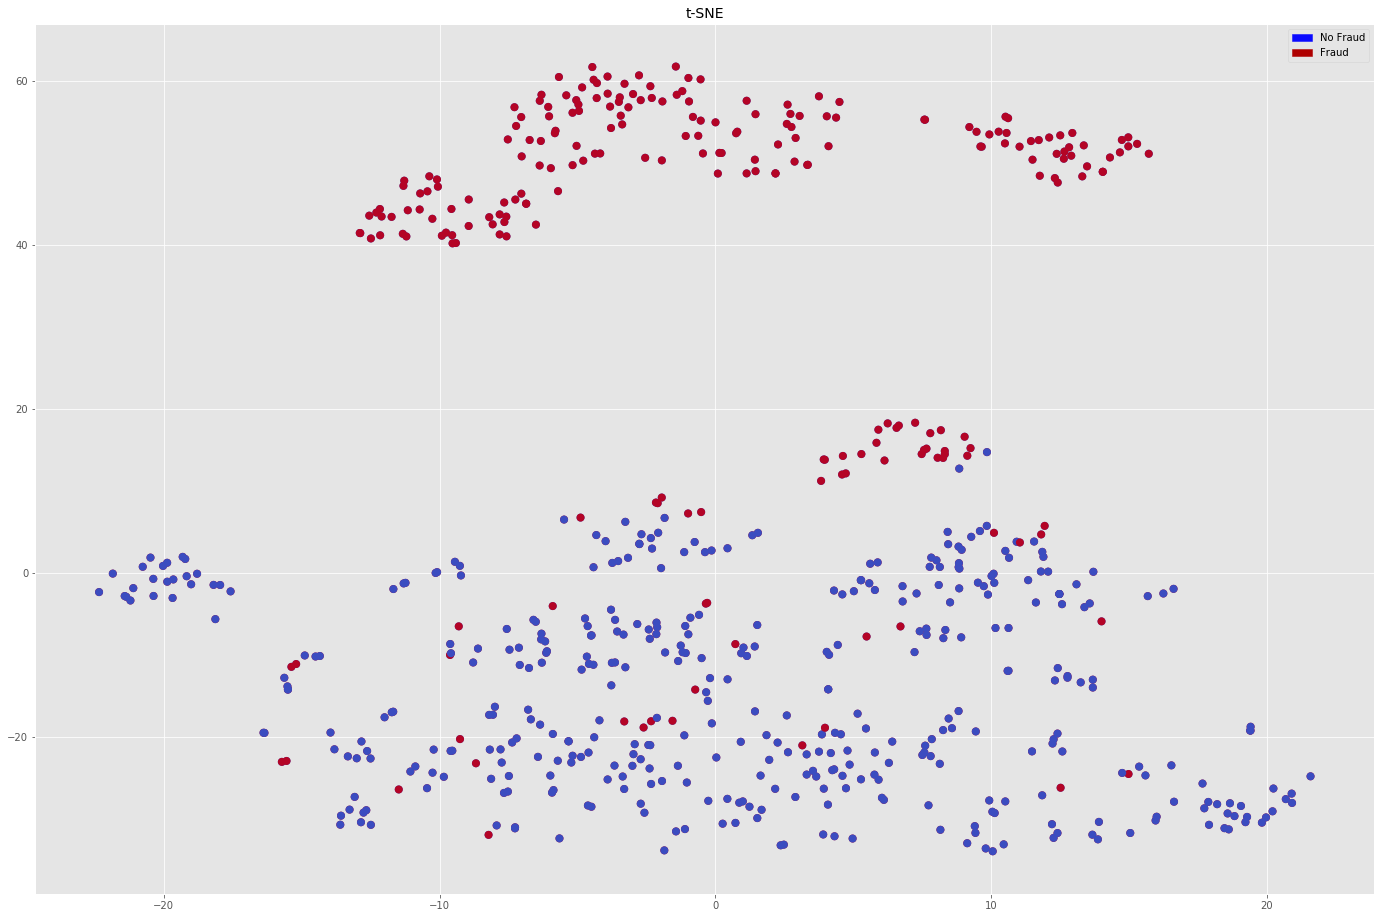

In [39]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [40]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [41]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [43]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (510, 30) (128, 30) 

Y_shapes:
 Y_train: Y_validation:
 (510,) (128,)


In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

In [46]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.968997 (0.019095)
LDA: 0.966928 (0.019943)
KNN: 0.949324 (0.026187)
CART: 0.882494 (0.039255)
SVM: 0.964505 (0.015863)
RF: 0.959186 (0.029113)


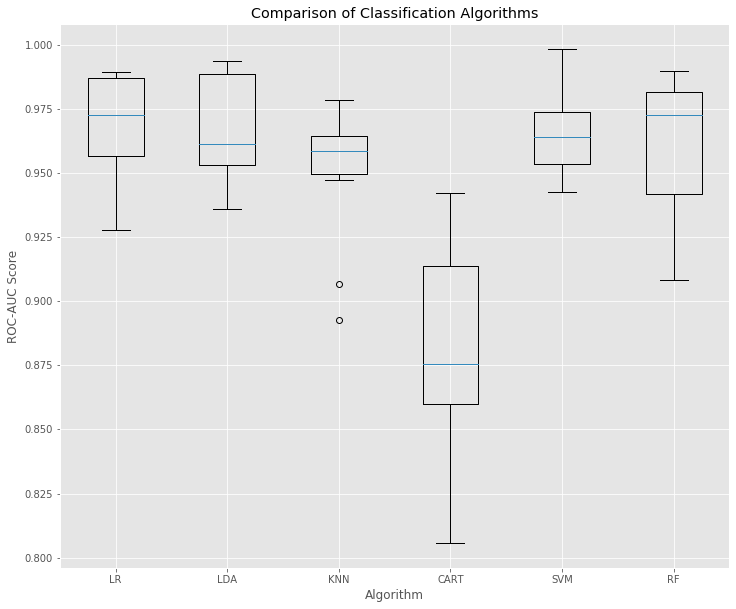

In [47]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()